In [5]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(suppress=True)

In [7]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

## !Target c'est l'index du topic! (0, 1, 2 ou 3)

In [21]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [30]:
newsgroups_train.target.shape

(2034,)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk

In [54]:
vectorizer = CountVectorizer(stop_words='english') #, tokenizer=LemmaTokenizer())
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(2034, 26576)

In [40]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

### Transformation de la matrice vectors (qui contient une première transformation des données newsgroup) avec  la décomposition SVD

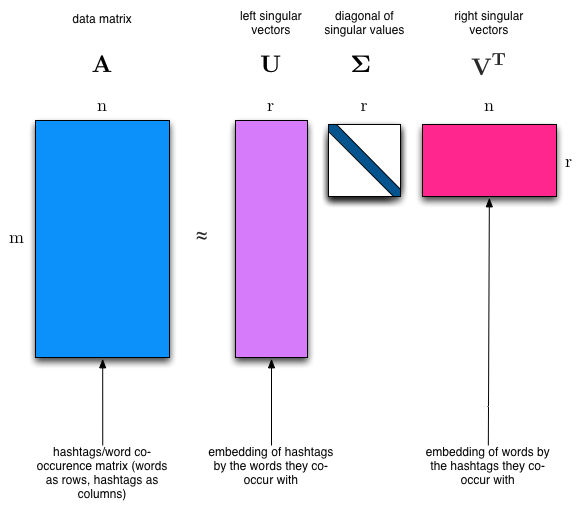

Où U est U s est sigma et Vt est Vh

In [45]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 41s, sys: 14.6 s, total: 1min 56s
Wall time: 32.2 s


In [51]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [52]:
show_topics(Vh)

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material',
 'larson theory universe physical den p2 p3 p1',
 'den p2 p3 p1 radius p12 p23 p13',
 'judas hanging reply db mr decenso greek death',
 'atheists atheism religious people religion prophecy matthew messiah',
 'space graphics people like sgi research package society',
 'telescope word national observatory satellite atheists infrared prefix',
 'people like nasa don think just time gay',
 'ra s


## Non-negative Matrix Factorization (NMF)

In [55]:
m,n=vectors.shape
d=5  # num topics

In [56]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [57]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

## TF-IDF



Topic Frequency-Inverse Document Frequency (TF-IDF) is a way to normalize term counts by taking into account how often they appear in a document, how long the document is, and how commmon/rare the term is.

TF = (# occurrences of term t in document) / (# of words in documents)

IDF = log(# of documents / # documents with term t in it)


In [59]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)

In [60]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [61]:
show_topics(H1)

['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']



Notes:
* For NMF, matrix needs to be at least as tall as it is wide, or we get an error with fit_transform
* Can use df_min in CountVectorizer to only look at words that were in at least k of the split texts



## Truncated SVD

SVD mais plus rapide comme on a pas besoin de toutes les données qui sortent de la décomposition

In [63]:
from sklearn import decomposition
import fbpca

In [64]:
%time u, s, v = np.linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 43s, sys: 14 s, total: 1min 57s
Wall time: 33.1 s


In [65]:
%time u, s, v = decomposition.randomized_svd(vectors, 10)

CPU times: user 9.69 s, sys: 4.71 s, total: 14.4 s
Wall time: 5.01 s


In [66]:
%time u, s, v = fbpca.pca(vectors, 10)

CPU times: user 3.22 s, sys: 1.69 s, total: 4.92 s
Wall time: 1.93 s
